# 5. Unsupervised machine learning - Clustering
** **
## Table of contents:

1. Importing libraries <br>
2. Importing dataframe <br>
3. Data preparation
    - 3.1 Removing categorical variables
    - 3.2 Handling missing values
    - 3.3 Handling "0" values
    - 3.4 Standardize data
4. The elbow technique
5. K-means clustering
6. Visualizations analysis
7. Descriptive statistics

# 1. Importing libraries
** **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Importing dataframe
** **

In [3]:
# Creating a path variabile for the folder
path = r'C:\Users\Simone\Desktop\Career Foundry\Esercizi modulo 7\CO2 emissions analysis'

In [4]:
# Importing the dataframe
df_co2 = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'emissions_clean_2015_no_countries_no_aggregations_flags.pkl'))

In [5]:
# Printing the first 5 rows
df_co2.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category,CO2_category,Average_CO2_emission
0,Afghanistan,coal,2015,0.03,0.03,72.06,34414.0,3.67,1.75,2.95,Medium-high,Low,1.5824
1,Afghanistan,natural_gas,2015,0.01,0.01,72.06,34414.0,3.67,1.75,0.28,Medium-high,Low,1.5824
2,Afghanistan,petroleum_n_other_liquids,2015,0.07,0.00,72.06,34414.0,3.67,1.75,3.94,Medium-high,Low,1.5824
3,Afghanistan,nuclear,2015,NaN,NaN,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low,1.5824
4,Afghanistan,renewables_n_other,2015,0.02,0.01,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low,1.5824


In [6]:
# Checking the shape
df_co2.shape

(5250, 13)

# 3. Data preparation
** **

Before running our clustering algorithm, is crucial that we prepare our data.

## 3.1 Removing categorical variables

K-means clustering can't handle categorical variables. Let's create a new dataframe withouth these variables.

In [7]:
df_co2_clustering = df_co2.drop(columns = ['Country', 'Energy_type', 'Year', 'GDP_category', 'CO2_category'])

In [8]:
df_co2_clustering

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Average_CO2_emission
0,0.03,0.03,72.06,34414.0,3.67,1.75,2.95,1.5824
1,0.01,0.01,72.06,34414.0,3.67,1.75,0.28,1.5824
2,0.07,0.00,72.06,34414.0,3.67,1.75,3.94,1.5824
3,NaN,NaN,72.06,34414.0,3.67,1.75,0.00,1.5824
4,0.02,0.01,72.06,34414.0,3.67,1.75,0.00,1.5824
...,...,...,...,...,...,...,...,...
5245,0.05,0.08,37.62,14654.0,11.51,4.48,4.59,2.0696
5246,0.00,0.00,37.62,14654.0,11.51,4.48,0.00,2.0696
5247,0.06,0.00,37.62,14654.0,11.51,4.48,4.38,2.0696
5248,NaN,NaN,37.62,14654.0,11.51,4.48,0.00,2.0696


Categorical variables successfully removed.

## 3.2 Handling missing values

As observed in the previous scripts, there are several missing values in our dataframe.

In [9]:
# Check for missing values

df_co2_clustering.isnull().sum()

Energy_consumption             896
Energy_production              895
GDP                            190
Population                     175
Energy_intensity_per_capita    125
Energy_intensity_by_GDP        125
CO2_emission                     0
Average_CO2_emission             0
dtype: int64

They're quite a lot, at least for the first two variables. <br>
We could use median to impute values, however the percentage of missing values is very high for those two columns. <br>
Additionally, the whole point of clustering is to let our algorithm cluster our datapoints, and if we impute a median to all these variables, it would be like to "artificially" create similarities between values. <br>
So in the end, I will just drop the observations with missing values.

In [10]:
# Removing observations with missing values
df_co2_clustering = df_co2_clustering[df_co2_clustering['Energy_consumption'].isnull() == False]

In [11]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['GDP'].isnull() == False]

In [12]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['Population'].isnull() == False]

In [13]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['Energy_intensity_per_capita'].isnull() == False]

In [14]:
# Checking again for missing values

df_co2_clustering.isnull().sum()

Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
Average_CO2_emission           0
dtype: int64

Perfect! Now we don't have any missing value. Code was not applied to some columns (such as Energy_production) beacause I knew that dropping NaN observation from a variable would affect also the other variable.

In [15]:
# Checking the shape
df_co2_clustering.shape

(4103, 8)

We removed around 1000 observations, but at least we don't have any missing value now.

## 3.3 Handling "0" values

Like in script number 4, let's also get rid of "0" values, because we are not sure what they actually mean.

In [16]:
# Filtering out 0 values
df_co2_clustering = df_co2_clustering[df_co2_clustering['Energy_consumption'] >= 0.00001]

In [17]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['Energy_production'] >= 0.00001]

In [18]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['GDP'] >= 0.00001]

In [19]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['Population'] >= 0.00001]

In [20]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['Energy_intensity_per_capita'] >= 0.00001]

In [21]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['Energy_intensity_by_GDP'] >= 0.00001]

In [22]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['CO2_emission'] >= 0.00001]

In [23]:
df_co2_clustering = df_co2_clustering[df_co2_clustering['Average_CO2_emission'] >= 0.00001]

In [24]:
# Let's check the min value of the columns using the describe function
df_co2_clustering.describe()

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Average_CO2_emission
count,1073.000000,1073.000000,1073.000000,1.073000e+03,1073.000000,1073.000000,1073.000000,1073.000000
mean,2.150820,2.290541,1439.751137,8.681667e+04,115.205853,4.731184,152.158667,88.296307
std,7.388051,7.127383,3408.604016,2.287087e+05,126.868976,2.711932,637.962379,276.378530
min,0.010000,0.010000,3.420000,4.150000e+02,0.970000,0.560000,0.200000,0.106000
25%,0.130000,0.050000,117.450000,8.880000e+03,28.810000,2.890000,7.510000,4.728800
50%,0.410000,0.240000,404.620000,2.884200e+04,78.210000,3.970000,27.020000,16.620000
75%,1.650000,1.570000,1125.940000,6.682800e+04,145.360000,6.050000,96.820000,62.345200
max,91.430000,87.630000,23128.340000,1.434512e+06,776.440000,19.600000,8939.780000,2094.652400


Great! No more 0 values. Let's check the shape of our dataframe.

In [25]:
df_co2_clustering.shape

(1073, 8)

We got rid of 0 values but now our dataframe is significatively smaller. <br>
Let's carry on with our analysis, for the time being.

In [26]:
# Checking again missing values
df_co2_clustering.isnull().sum()

Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
Average_CO2_emission           0
dtype: int64

## 3.4 Standardize data

Now, this is a crucial part. The scale in our variables is pretty much different (let's think about the scale of the Population variable) so before performing a K-means clustering we need to standardize data. <br>
I will use the standardscaler function to standardize all the dataframe.

In [27]:
# Defining a scaling object
scaler = StandardScaler()

In [28]:
# Creating an object containing an array of standardized data
df_co2_clustering_standard = scaler.fit_transform(df_co2_clustering)

Let's have a look at our output.

In [29]:
df_co2_clustering_standard

array([[-0.28719471, -0.31731067, -0.40143381, ..., -1.09979648,
        -0.23399224, -0.31389682],
       [-0.28990304, -0.32011806, -0.40143381, ..., -1.09979648,
        -0.23817939, -0.31389682],
       [-0.28448637, -0.31450328, -0.41272229, ..., -0.46895577,
        -0.23286312, -0.31664651],
       ...,
       [-0.27094469, -0.30327373, -0.40700467, ..., -0.63865561,
        -0.22624522, -0.31074026],
       [-0.28719471, -0.31871437, -0.35003398, ..., -1.43550703,
        -0.23408633, -0.31606877],
       [-0.28448637, -0.3102922 , -0.41154237, ..., -0.09266482,
        -0.23142035, -0.3121332 ]])

Perfect! Now we can use this array to decide how much clusters to use.

# 4. The elbow technique
** **

Through the elbow technique we can decide how much clusters we need for our cluster analysis. <br>
Let's create 10 different set, containing from 1 to 10 clusters.

In [30]:
# Setting the range of clusters and a kmeans object containing the range assigned above
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [31]:
# Now let's use our standardized data to assign a score to every combination of clusters
score = [kmeans[i].fit(df_co2_clustering_standard).score(df_co2_clustering_standard) for i in range(len(kmeans))]

score

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

[-8583.999999999998,
 -4927.312379857671,
 -3446.392342520112,
 -2280.162507413219,
 -1877.9235039270172,
 -1539.1261550881136,
 -1241.770828492876,
 -1054.0815071289228,
 -889.3819632418268]

This score is not useful in this state. Let's plot the elbow curve using scores.

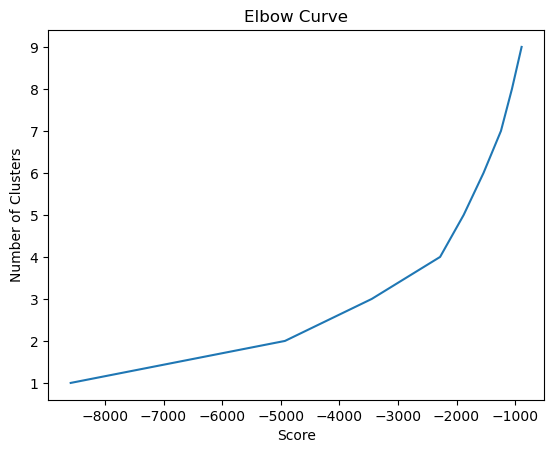

In [32]:
# Ploting the elbow curve using PyLab

pl.plot(score,num_cl)
pl.xlabel('Score')
pl.ylabel('Number of Clusters')
pl.title('Elbow Curve')
pl.show()

The curve begins to flatten out after 4 clusters!
That means that the optimal number of clusters of our data is 4.

# 5. K-means clustering
** **

We are now ready to split our entire set of datapoints into 4 clusters!

In [33]:
# Inputting the decided number of clusters into the kmeans object
kmeans = KMeans(n_clusters = 4)

In [34]:
# Fitting the kmeans object with our standardized data

kmeans.fit(df_co2_clustering_standard)

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=4)

We're done! The algorithm created clusters based on our standardized data. <br>
Now we can create a new column in our original database, so we can know to which cluster belong every observation.

In [35]:
# Creating the new column
df_co2_clustering['Cluster_number'] = kmeans.fit_predict(df_co2_clustering_standard)

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [36]:
# Checking our dataframe to see the new column
df_co2_clustering.head(10)

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Average_CO2_emission,Cluster_number
0,0.03,0.03,72.06,34414.0,3.67,1.75,2.95,1.5824,0
1,0.01,0.01,72.06,34414.0,3.67,1.75,0.28,1.5824,0
7,0.05,0.05,33.60,2891.0,40.23,3.46,3.67,0.8228,0
11,1.49,3.11,477.36,39728.0,59.20,4.93,77.81,27.6464,0
12,0.86,3.58,477.36,39728.0,59.20,4.93,53.05,27.6464,0
21,0.03,0.03,204.60,27884.0,14.32,1.95,0.45,4.1296,0
22,0.32,3.87,204.60,27884.0,14.32,1.95,21.29,4.1296,0
31,1.73,1.34,867.71,43129.0,88.82,4.41,92.18,40.4844,0
32,1.63,1.32,867.71,43129.0,88.82,4.41,101.03,40.4844,0
45,1.78,12.09,1113.00,23859.0,242.16,5.19,162.33,80.6660,3


In [37]:
# Checking the distribution of values of the new column
df_co2_clustering['Cluster_number'].value_counts()

0    844
3    184
1     40
2      5
Name: Cluster_number, dtype: int64

It seems the majority of datapoints are gathered into two big clusters, while other two clusters contain very few observations. <br>
This reflects in a certain sense the nature of our dataset. In fact we've already seen that three countries in particular (India, China and United States) are like a league of their own, compared to other countries.

# 6. Visualizations analysis
** **

Now that we divided our data into cluster, all that is left to do is to analyze different visualizations, using our clusters as hue labels. <br>
Let's start with a relationship between two variables that we investigated multiple times: energy consumption and CO2 emissions.

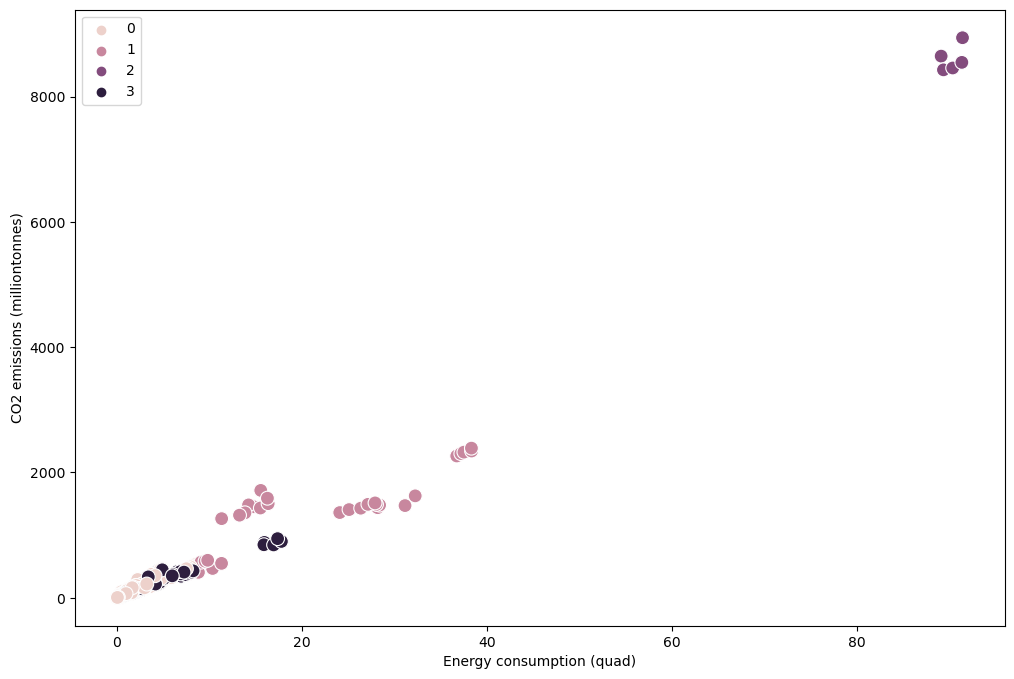

In [38]:
# Creating a scatterplot for Energy consumption and CO2 emissions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_co2_clustering['Energy_consumption'], y=df_co2_clustering['CO2_emission'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Energy consumption (quad)') # Label x-axis.
plt.ylabel('CO2 emissions (milliontonnes)') # Label y-axis.
plt.show()

From now on we will call: <br>
cluster 0 as light pink,<br> 
cluster 1 as pink, <br>
cluster 2 as purple,<br> 
cluster 3 as dark purple, <br>
<br>
This chart isn't giving us new insights. It seems that both variables had an impact into the clustering process. <br>
The light pink cluster and the dark purple cluster contain observations with the fewer values of emissions and consumption. <br>
The pink cluster contains the highest values, while the purple is basically some kind of outlier, so it has a cluster of its own.

Let's try to analize something different.

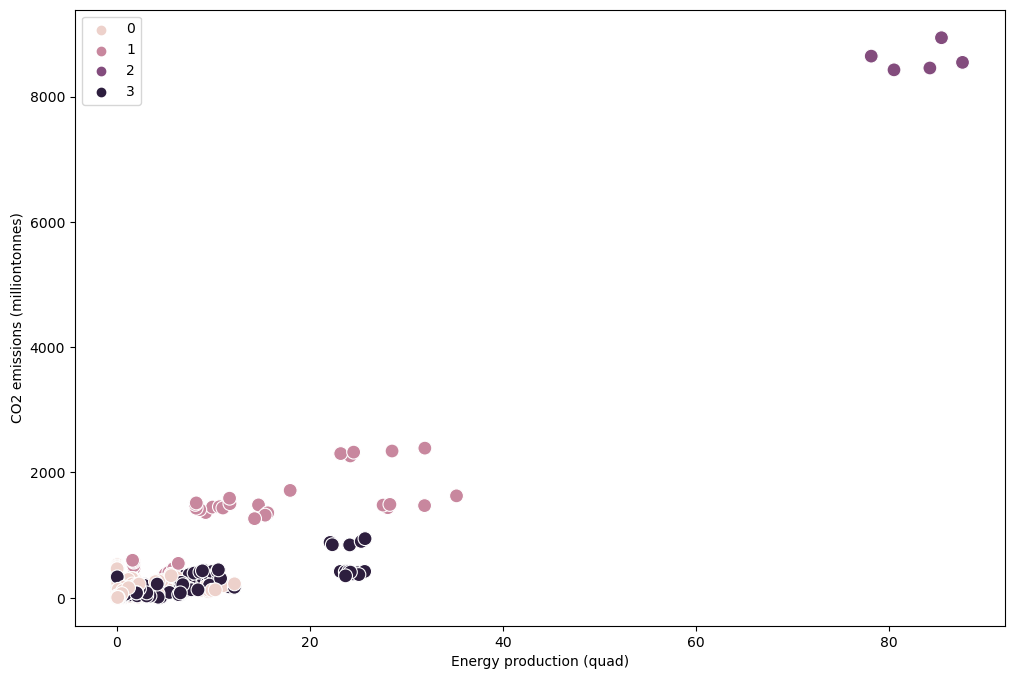

In [39]:
# Creating the scatterplot for Energy production and CO2 emissions
plt.figure(figsize=(12,8))
ax_2 = sns.scatterplot(x=df_co2_clustering['Energy_production'], y=df_co2_clustering['CO2_emission'], hue=kmeans.labels_, s=100) 
ax_2.grid(False)
plt.xlabel('Energy production (quad)')
plt.ylabel('CO2 emissions (milliontonnes)')
plt.show()

The result is similar to the previous chart. <br>
Light pink and dark purple contain the lowest values in terms of emissions, while pink and purple the highest. <br>
What is different, is that among the dark purple cluster there is a big variance when it comes to energy production. <br>
Maybe this variable didn't have a great impact into clusters division process as other variables.

Let's try to plot togethere the two energy variables.

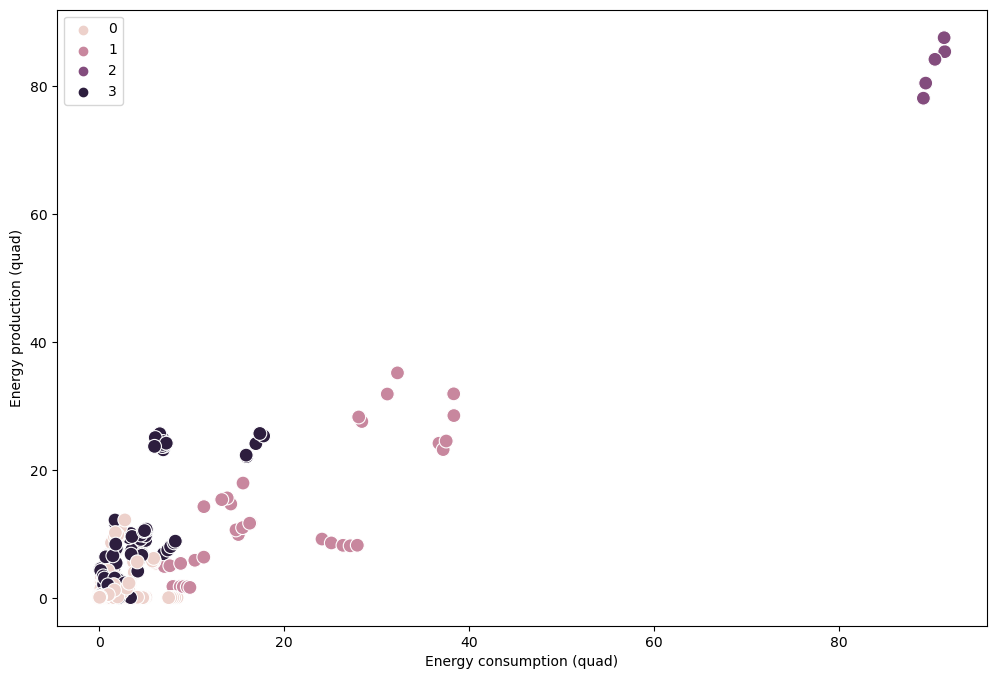

In [40]:
# Creating the scatterplot for Energy consumption and Energy production
plt.figure(figsize=(12,8))
ax_3 = sns.scatterplot(x=df_co2_clustering['Energy_consumption'], y=df_co2_clustering['Energy_production'], hue=kmeans.labels_, s=100) 
ax_3.grid(False)
plt.xlabel('Energy consumption (quad)')
plt.ylabel('Energy production (quad)')
plt.show()

The scenario is very similar in this case as well. <br>
Light pink and dark purple are clustered in the bottom left corner, with some exceptions for the dark purple cluster. <br>
Pink cluster has a linear upward trend. Purple cluster sits in the top right corner all alone.

I need to explore something more different. Let's try to see how appear a correlation between emissions and population.

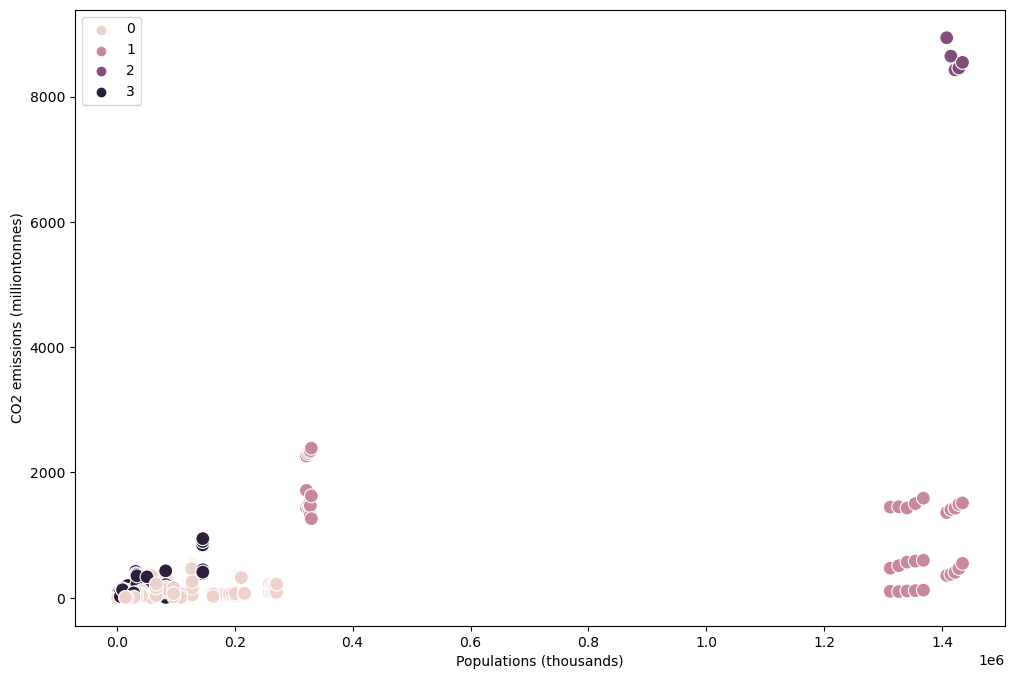

In [41]:
plt.figure(figsize=(12,8))
ax_4 = sns.scatterplot(x=df_co2_clustering['Population'], y=df_co2_clustering['CO2_emission'], hue=kmeans.labels_, s=100) 
ax_4.grid(False)
plt.xlabel('Populations (thousands)')
plt.ylabel('CO2 emissions (milliontonnes)')
plt.show()

This is something very <b>interesting</b>. <br>
There are two groups from the pink cluster that are very far from each other.<br> 
Despite the huge difference in term of population, they are grouped together in the same cluster. <br>
And despite some values of the pink cluster have a population value as high as the purple cluster, they still belong to the pink cluster. <br>
According to this insight, I am convinced that population did not have a huge impact on the clustering process, while CO2 emissions definitely had.

If CO2 emissions were a factor so important in clustering our data, let's see what happens if we plot together emissions and average emissions.

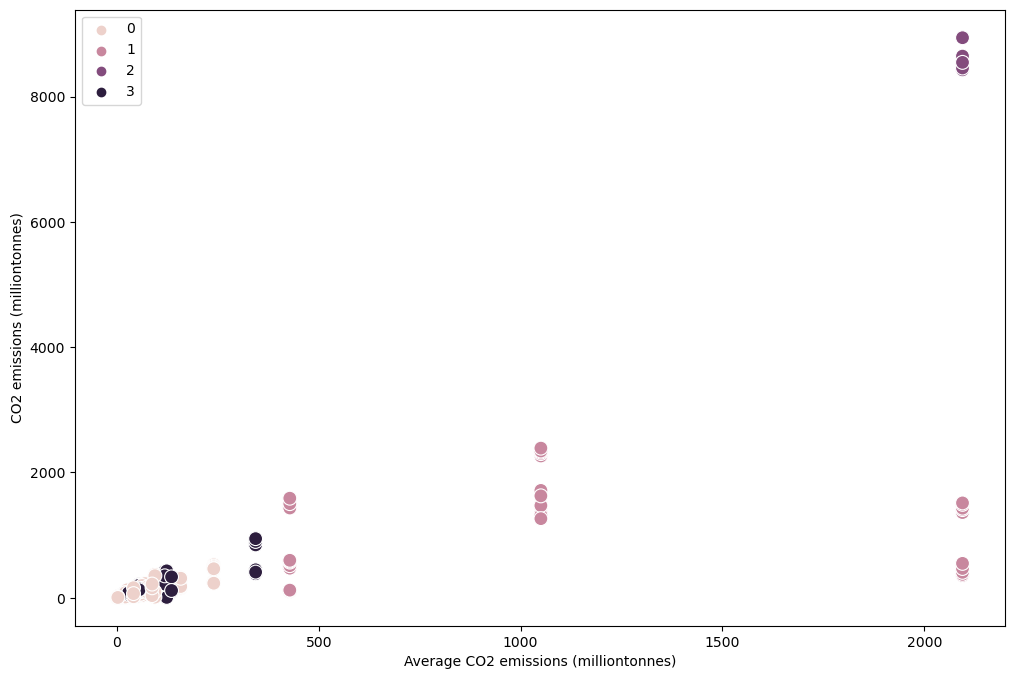

In [42]:
plt.figure(figsize=(12,8))
ax_5 = sns.scatterplot(x=df_co2_clustering['Average_CO2_emission'], y=df_co2_clustering['CO2_emission'], hue=kmeans.labels_, s=100) 
ax_5.grid(False)
plt.xlabel('Average CO2 emissions (milliontonnes)')
plt.ylabel('CO2 emissions (milliontonnes)')
plt.show()

The more the average increases, the more the clusters separate from each other. <br>
Purple is still on a league of its own because, even on average, the values are out of scale compared to others data points. <br>
It's like the 5 observations in the purple cluster are too much different from any other observations in the entire dataframe.

Let's try another one, featuring Energy consumption and Population.

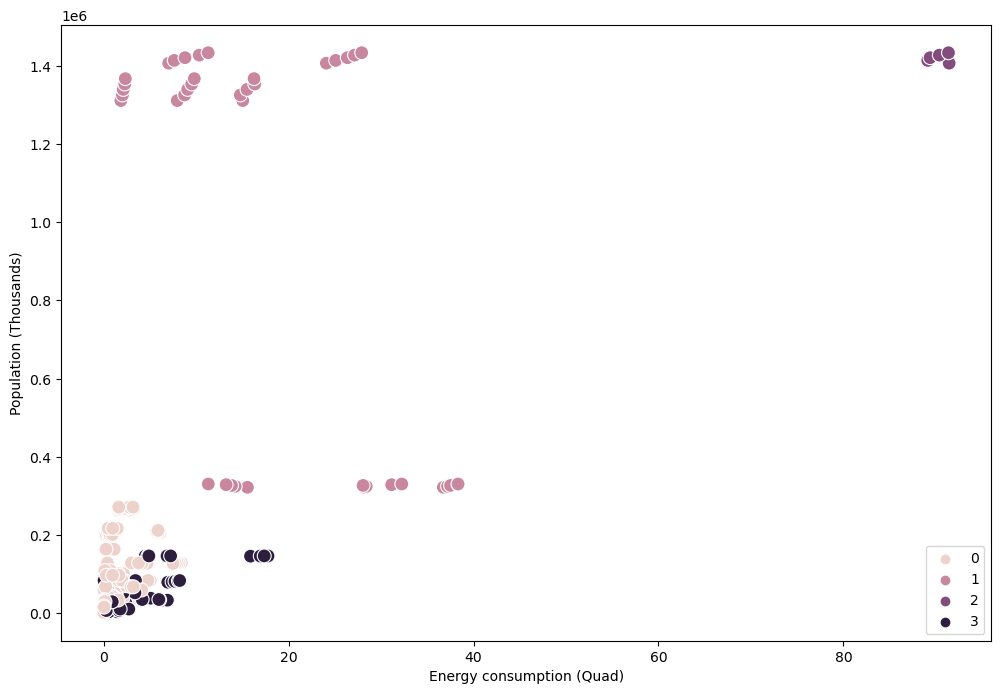

In [43]:
plt.figure(figsize=(12,8))
ax_6 = sns.scatterplot(x=df_co2_clustering['Energy_consumption'], y=df_co2_clustering['Population'], hue=kmeans.labels_, s=100) 
ax_6.grid(False)
plt.xlabel('Energy consumption (Quad)')
plt.ylabel('Population (Thousands)')
plt.show()

That's it! Here I can see a clear trend among clusters.<br>
<br>
<b>Light pink:</b> relatively small values, more clustered around energy consumption, more variability in number of population. <br>
<b>Dark Purple:</b> relatively small values, more clustered around number of population, more variability in energy consumption.<br>
<b>Pink:</b> High values, either high population or high energy consumption.<br>
<b>Purple:</b> extreme values for both population and consumption.

To gain more insights about this clustering analysis, let's check the descriptive statistics of our clusters.

# 7. Descriptive statistics
** **

First of all, let's create a new column and assign to every cluster number, a colour.

In [46]:
# Renaming the clusters into colors
df_co2_clustering.loc[df_co2_clustering['Cluster_number'] == 0, 'Cluster_name'] = 'Light pink'
df_co2_clustering.loc[df_co2_clustering['Cluster_number'] == 1, 'Cluster_name'] = 'Pink'
df_co2_clustering.loc[df_co2_clustering['Cluster_number'] == 2, 'Cluster_name'] = 'Purple'
df_co2_clustering.loc[df_co2_clustering['Cluster_number'] == 3, 'Cluster_name'] = 'Dark purple'

In [49]:
# Calculating descriptive statistics
df_co2_clustering.groupby('Cluster_name').agg({'Energy_consumption':['mean', 'median'],
                                               'Energy_production':['mean', 'median'],
                                               'GDP':['mean', 'median'],
                                               'Population':['mean', 'median'],
                                               'Energy_intensity_per_capita': ['mean', 'median'],
                                               'Energy_intensity_by_GDP': ['mean', 'median'],
                                               'CO2_emission': ['mean', 'median'],
                                               'Average_CO2_emission': ['mean', 'median']})

Energy_consumption         Energy_production          \
                           mean  median              mean  median   
Cluster_name                                                        
Dark purple            2.376793   1.445          5.161413   2.985   
Light pink             0.835225   0.300          0.701066   0.125   
Pink                  17.848000  14.920         12.508000   9.545   
Purple                90.330000  90.370         83.206000  84.250   

                       GDP              Population             \
                      mean    median          mean     median   
Cluster_name                                                    
Dark purple     952.529674    444.87  3.187189e+04    17831.0   
Light pink      773.533543    343.56  4.854573e+04    29121.0   
Pink          15357.810500  18357.83  9.802513e+05  1326362.0   
Purple        20482.556000  20444.71  1.421441e+06  1421755.0   

             Energy_intensity_per_capita         Energy_intensity_by_GDP  \
                                    mean  median                    mean   
Cluster_name                                                               
Dark purple                   324.659022  301.82                8.646576   
Light pink                     68.120841   61.39                3.849076   
Pink                          147.037000   99.89                5.046500   
Purple                        100.630000   99.89                7.022000   

                    CO2_emission           Average_CO2_emission             
             median         mean    median                 mean     median  
Cluster_name                                                                
Dark purple   8.615   145.498370    76.530            80.410698    53.1848  
Light pink    3.500    55.891209    19.280            31.223871    13.0804  
Pink          5.160  1157.666500  1418.245          1078.004000  1050.1492  
Purple        6.950  8603.142000  8546.290          2094.652400  2094.6524

Judging from this descriptive statistics, all variables somewhat played a role in the clustering process. <br>
<br>
Light pink and dark purple, on average, have the lowest values basically in all categories (only exception is Energy intensity). <br>
The difference in mean and median is not so high, but generally dark purple cluster contains higher values compared to light pink. <br>
Not only light pink and dark purple are clusters very similar to each other, they also basically contains 90% of our observations (respectively 844 and 184 count of values). <br>
<br>
The situation is very different for pink cluster: it contains only 40 observations, with values definitely higher than light pink and dark purple clusters. <br>
Then there is purple: basically some kind of an outlier, with values that are not even comparable to other clusters.

Basically it seems that clustering gave us an overview of what we already noticed in our previous analysis: <br>
<br>
The majority of values recorded in countries are similar to each other (with small differences, as seen in light pink and dark purple clusters). <br>
<br>
Then there are countries such as India, United States and China that are above all others, with higher Energy consumption, Energy production, GDP, Population, CO2 emissions, and so on. <br>
<br>
Then, the last cluster, basically contains the 5 observations related to China and "coal" as energy type, that deserves a cluster of its own. <br>
<br>
This clustering analysis seems to hint again at the fact that further analysis should be conducted separately: <br>
On one side, we have basically India, China and United States; <br>
On the other side, the rest of countries.